* Author: Mingfeng Liu(NNU)
* E-mail: phylmf@njnu.edu.cn

# Example from SDSS Webpage

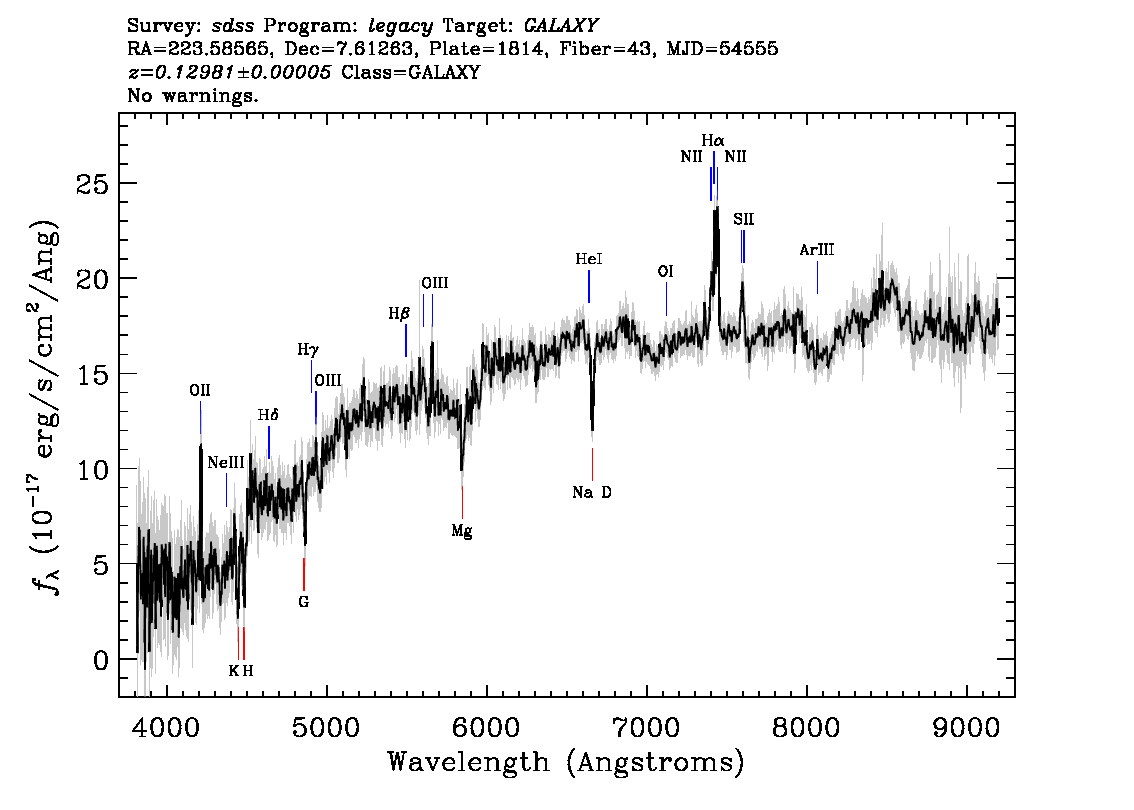

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import AutoMinorLocator
from astropy.io import fits

# Prepare the Spectrum Data

In [2]:
# input the target name

gal_name = 'SDSS J145420.55+073645.4'

# Read the FITS data

spec_file = '/home/phylmf/Code/idl_ppxf_run/spec-1814-54555-0043.fits'
spec_hdu = fits.open(spec_file)

# load the SDSS spectrum

gal_spec = spec_hdu[1].data

# get the inferred spectroscopic redshift by SDSS team
# there is conflicts in z value between the FITS file and SDSS website
# for consistence with our IDL version tutorial, we apply the former one value 

gal_z = float(spec_hdu[2].data['Z'])

gal_z_err = float(spec_hdu[2].data['Z_ERR']) 

wave = 10 ** gal_spec['loglam'] / (1 + gal_z)

flux = gal_spec['flux']

ivar = gal_spec['ivar']

noise = ivar ** (- 0.5)

# red the galaxy image

gal_img = mpimg.imread("/home/phylmf/Code/idl_ppxf_run/py_ppxf/spec-1814-54555-0043.jpeg")

# read the basic information:

gal_ra = spec_hdu[0].header['RA']
gal_dec = spec_hdu[0].header['DEC']

gal_plateid = spec_hdu[0].header['PLATEID']
gal_mjd = spec_hdu[0].header['MJD']
gal_fiberid = spec_hdu[0].header['FIBERID']

gal_redshift = '$z_{spec}$=' + str("{:.4f}".format(gal_z)) + '±' + str("{:.4f}".format(gal_z_err))

# Prepare Spectra Features Lines
* You can refer to the SDSS webpage about SSSP line index information via the link given below:
* (https://data.sdss.org/datamodel/files/SSPP_REDUX/RERUN/PLATE4/output/param/ssppOut_lineindex.html)
* SDSS DR6 line table:
* (https://classic.sdss.org/dr6/algorithms/linestable.php)
* UV/Opt. Line table with physical explanation(recommended!):
* (http://astronomy.nmsu.edu/drewski/tableofemissionlines.html)
* Anyway, you can always refer to Xueguang Zhang's book: 
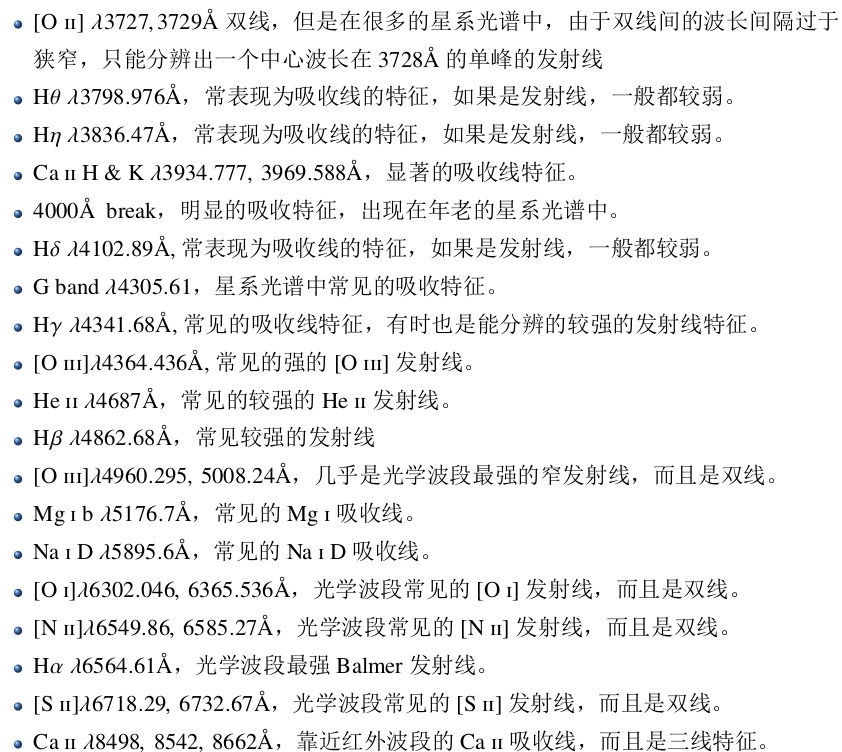

In [3]:
# emission lines

el_name = [r'$O_{\mathrm{II}}$', 
           r'$Ne_{\mathrm{III}}$', 
           r'$H_{\delta}$', 
           r'$H_{\gamma}$', 
           r'$O_{\mathrm{III,4363}}$', 
           r'$H_{\beta}$', 
           r'$O_{\mathrm{III,4959,5007}}$', 
           r'$He_{\mathrm{I}}$', 
           r'$H_{\alpha}$', 
           r'$N_{\mathrm{II,6548,6583}}$', 
           r'$S_{\mathrm{II,6716,6731}}$', 
           r'$Ar_{\mathrm{III}}$']

el_color = 'blue'

el_wave = {}
el_wave[el_name[0]] = [3728]
el_wave[el_name[1]] = [3868.760]
el_wave[el_name[2]] = [4101.742]
el_wave[el_name[3]] = [4340.471]
el_wave[el_name[4]] = [4363.210]
el_wave[el_name[5]] = [4861.333]
el_wave[el_name[6]] = [4958.911, 5006.843]
el_wave[el_name[7]] = [5875.624]
el_wave[el_name[8]] = [6562.819]
el_wave[el_name[9]] = [6548.050, 6583.460]
el_wave[el_name[10]] = [6716.440, 6730.810]
el_wave[el_name[11]] = [7135.790]

# absorption line

al_name = [r'K', r'H', r'G', r'Mg', r'Na']

al_color = 'red'

al_wave = {}
al_wave[al_name[0]] = [3934.777]
al_wave[al_name[1]] = [3969.588]
al_wave[al_name[2]] = [4305.61]
al_wave[al_name[3]] = [5176.7]
al_wave[al_name[4]] = [5895.6]

# Plot the Spectrum and Save as Figure File

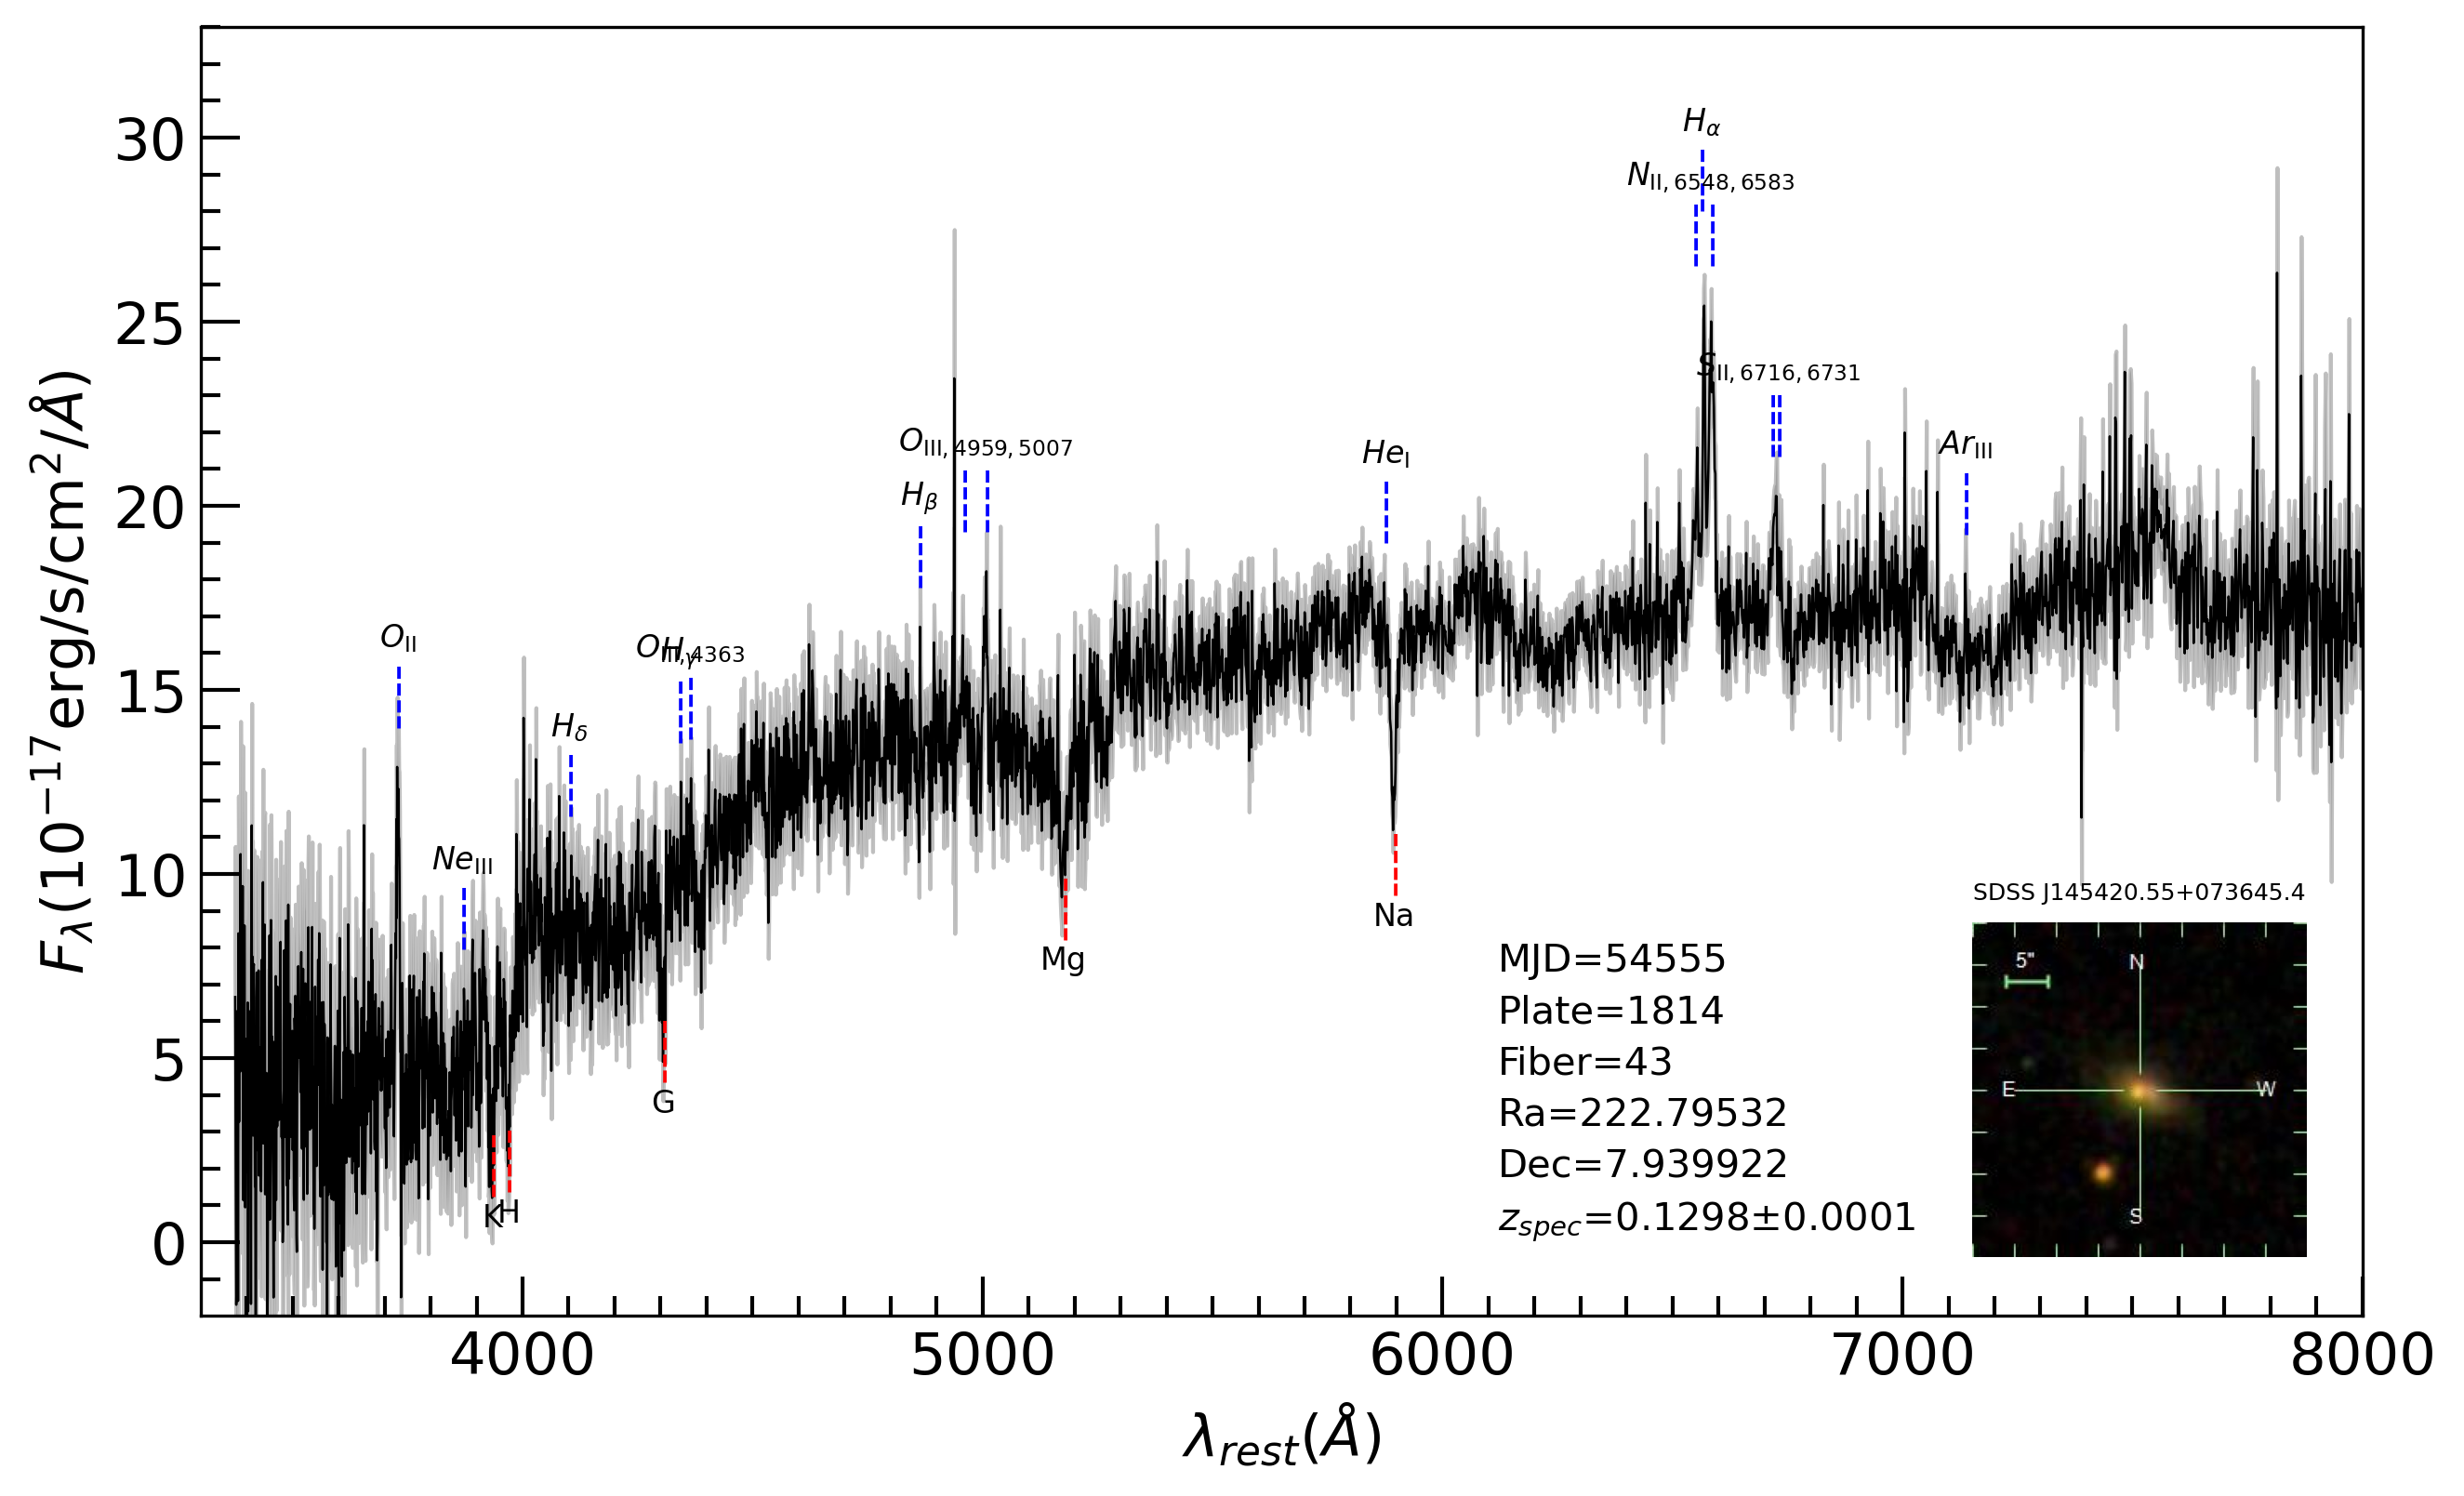

In [4]:
# set up plot (symbols in LaTeX Math Mode)

fig, ax = plt.subplots(figsize = (10,6), dpi = 300)

text_kwargs = dict(horizontalalignment='left',
                   verticalalignment='top',
                   linespacing = 5)

ax.set_xlabel('$\lambda_{rest} (\AA)$', fontsize = 15)
ax.set_ylabel('$F_\lambda (10^{-17}$erg/s/cm$^{2}/\AA)$', fontsize = 15)
ax.set_xlim(3300., 8000.)
ax.set_ylim(-2., 33)
ax.minorticks_on()

# generate minor axis

x_minor_locator = AutoMinorLocator(n = 10)
y_minor_locator = AutoMinorLocator(n = 5)

# apply minor axis

ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)

ax.tick_params(axis = 'both', which = 'minor', length = 5, width = 1, direction = 'in', color = 'black')
ax.tick_params(axis = 'both', which = 'major', length = 10, width = 1, direction = 'in', color = 'black')
ax.tick_params(axis = 'both', labelsize = 15)

# plot spectrum

ax.plot(wave, flux, color = 'black', linewidth = 0.6)
ax.fill_between(wave, flux - noise, flux + noise, color = 'gray', alpha = 0.5)

# plot emission lineq label 

band_width = 5 # set band width for masking and find peak value
line_offset = 2

for i in range(len(el_name)):
    for j in range(len(el_wave[el_name[i]])):
        # for specifying the NII and H_alpha line
        if i in [8, 9]:
            line_mask = (wave > el_wave[el_name[i]][j] - 100) & (wave < el_wave[el_name[i]][j] + 100)
            line_wave = wave[line_mask]
            line_flux = flux[line_mask]
            line_peak_mask = (line_flux == np.max(line_flux))
            line_pos = el_wave[el_name[i]][j]
            line_peak = np.max(line_flux)
            
            if i == 8:
                line_peak = line_peak + 1.5
        elif i in [6, 10]:
            line_mask = (wave > el_wave[el_name[i]][0] - 5) & (wave < el_wave[el_name[i]][1] + 5)
            line_wave = wave[line_mask]
            line_flux = flux[line_mask]
            line_peak_mask = (line_flux == np.max(line_flux))
            line_pos = el_wave[el_name[i]][j]
            line_peak = np.max(line_flux)
        
        else:
            line_mask = (wave > el_wave[el_name[i]][j] - band_width) & (wave < el_wave[el_name[i]][j] + band_width)
            line_wave = wave[line_mask]
            line_flux = flux[line_mask]
            line_peak_mask = (line_flux == np.max(line_flux))
            line_pos = el_wave[el_name[i]][j]
            line_peak = np.max(line_flux)
        
        
        ax.text(line_pos, line_peak + line_offset, '----', color = el_color, ha = 'center', va = 'center', fontsize = 12, rotation=90)
    
    ax.text(line_pos, line_peak + line_offset + 1.5, el_name[i], color = 'black', ha = 'center', va = 'center', fontsize = 8)

    
# plot absoption lineq label

band_width = 2 # set band width for masking and find peak value
line_offset = 2

for i in range(len(al_name)):
    for j in range(len(al_wave[al_name[i]])):
        line_mask = (wave > al_wave[al_name[i]][j] - band_width) & (wave < al_wave[al_name[i]][j] + band_width)
        line_wave = wave[line_mask]
        line_flux = flux[line_mask]
        line_peak_mask = (line_flux == np.max(line_flux))
        line_pos = al_wave[al_name[i]][j]
        line_peak = np.max(line_flux)
        ax.text(line_pos, line_peak - line_offset, '----', color = al_color, ha = 'center', va = 'center', fontsize = 12, rotation=90)
    
    ax.text(line_pos, line_peak - line_offset - 1.5, al_name[i], color = 'black', ha = 'center', va = 'center', fontsize = 8)

# add galaxy information

ax.text(0.6, 0.29, 'MJD=' + str(gal_mjd), transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

ax.text(0.6, 0.25, 'Plate=' + str(gal_plateid), transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

ax.text(0.6, 0.21, 'Fiber=' + str(gal_fiberid), transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

ax.text(0.6, 0.17, 'Ra=' + str(gal_ra), transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

ax.text(0.6, 0.13, 'Dec=' + str(gal_dec), transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

ax.text(0.6, 0.09, gal_redshift, transform = ax.transAxes,
        fontsize = 10, color = 'black', **text_kwargs, zorder = 10)

# Plot galaxy image

ax_inset = plt.axes([.72, 0.145, .2, .2])
ax_inset.imshow(gal_img)
ax_inset.axis('off')
ax_inset.set_title(gal_name, fontsize = 6)

# Save figure

fig_name = 'spectrum_' + 'SDSS J145420.55+073645.4.'

fig.savefig(fig_name + 'png', bbox_inches = 'tight', format = 'png', dpi = 300)
fig.savefig(fig_name + 'pdf', bbox_inches = 'tight', format = 'pdf', dpi = 300)